# Data Science in Practice 2020

## Problem Set 1

### Descriptive report

Authors :
- Rayan Chaouche
- Yann Martinson
- Christopher Padovani
- Jules Triomphe

### 1. Initialization

#### 1.1 Primary analysis

Loading modules :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

Loading the customer file :

In [2]:
clients_df = pd.read_csv('customers.csv')
print('There are %s clients.' %(len(clients_df)))

There are 7043 clients.


Checking out the provided information for each customer :

In [3]:
clients_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!---
**Texte à supprimer**

Sert à vérifier le type de données : objet, int64, int32, etc.
<br>[Documentation *dtypes*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
--->

<!---
# a = clients_df.dtypes
# clients_df.dtypes['customerID']
--->

Extracting the characteristics of all float type customer information categories, we notice that there are no empty cells for each of them and that the longest tenure is 72 months.

We also see that there is a problem with the **TotalCharges** category as it does not appear in this list.

In [4]:
clients_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using the *.isnull()* method, we count the number of missing values for each information category of the dataset. This does not count empty strings however.

We notice that there are no missing values in the dataset.

In [5]:
clients_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 1.2 File cleanup

We clean out all lines where the **TotalCharges** category is empty :

In [6]:
clients_df = pd.read_csv('customers.csv')
total_length = len(clients_df)
clients_df = clients_df[clients_df['TotalCharges'] != ' ']
clients_df.TotalCharges = clients_df.TotalCharges.astype('float')
cleanup_length = len(clients_df)
print('%s lines were deleted.' %(total_length - cleanup_length))

11 lines were deleted.


#### 1.3 Identifying values of interest

We extract the list of loyal clients (i.e. who do not churn) :

In [7]:
clients_df_loyal = clients_df[clients_df['Churn'] != 'Yes']
print('There are %s loyal clients.' %(len(clients_df_loyal)))

There are 5163 loyal clients.


### 2. Data analysis

#### 2.1 Frequency analysis

We extract the characteristics of all object type customer information categories.

The **freq** line indicates how many times the **top** value appears in the dataset for the same information category.

In [8]:
clients_df_loyal.describe(include = ['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
unique,5163,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1
top,2792-VPPET,Male,Yes,No,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,No
freq,1,2619,2724,3390,4653,2536,1957,2036,1902,1883,2026,1889,1913,2220,2768,1296,5163


<!---
- Au niveau des counts, on a pas de cellules sans valeurs pour les autres pptés. Donc aucune case du tableau n'est vide. 
- unique nous indique qu'il y a bien 7043 lignes différentes dans le tableau. 
- freq nous indique quelle variable a le plus tendance de sortir. Pour gender, on a 3555 individu du même sex contre 3488 de l'autre sex. 
- top nous indique la variable correspondant a freq. Pour gender, on a 3555 fois la variable male. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=pandas%20dataframe%20describe#pandas.DataFrame.describe
--->

We create plots for all information types for loyal clients with non-singular and less than 5 unique values.

In [9]:
def histogram(df):
    """
    Returns a chart for each of the information categories unless if there is a unique value
    in a category or more than 4 unique values.
    
    Keyword arguments :
    df -- Pandas DataFrame
    """
    
    features = list(df.columns) # Creates a list with each column's label
    
    analysis = {} # Initializes the list containing the analyzed data
    ignored_features = [] # Initializes the list containing the ignored categories
    
    for feature in features:
        list_values = list(df[feature].unique()) # Creates a list of all the unique values of a data category
        if len(list_values) == 1 or len(list_values) > 4:
            ignored_features.append(feature)
            continue
        count = list(df[feature].value_counts()) # Counts the number of occurences for each unique value in the data category
        analysis[feature] = {list_values[i]: count[i] for i in range(len(list_values))} 
        # Associates each value with its appearance count
        
        fig, ax = plt.subplots(figsize=(15,5))
        plt.bar(range(len(list_values)), analysis[feature].values(), align='center', alpha=0.5)
        plt.xticks(range(len(list_values)), analysis[feature].keys())
        
        plt.title(feature)
        
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate('{:.0%}'.format(height/len(clients_df_loyal)), (p.get_x()+.5*width, p.get_y() + height + 30), ha = 'center')
            
        plt.show()
    
    for category in ignored_features:
        print('The %s data is not plotted.' %(category))
        
    #return answers

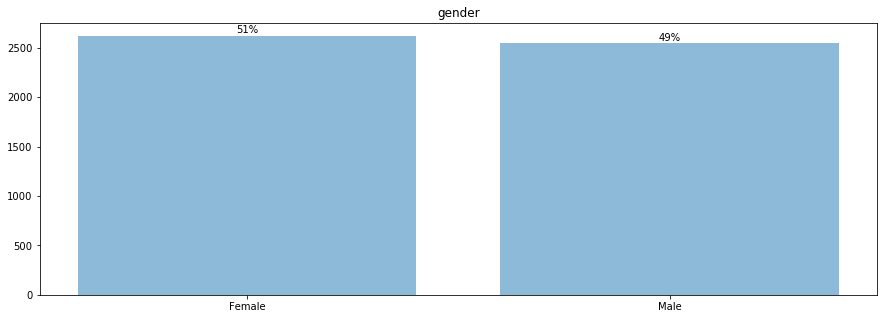

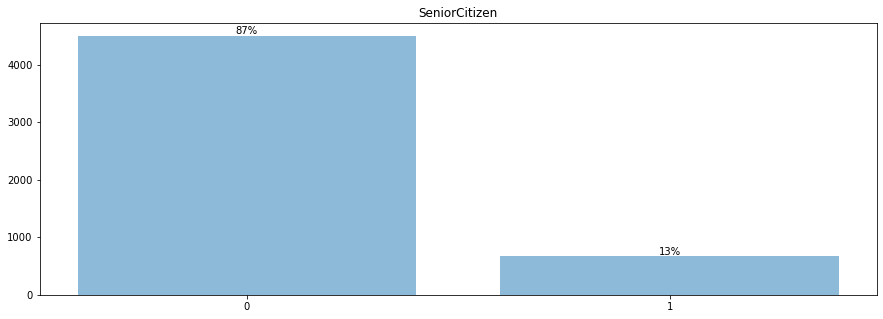

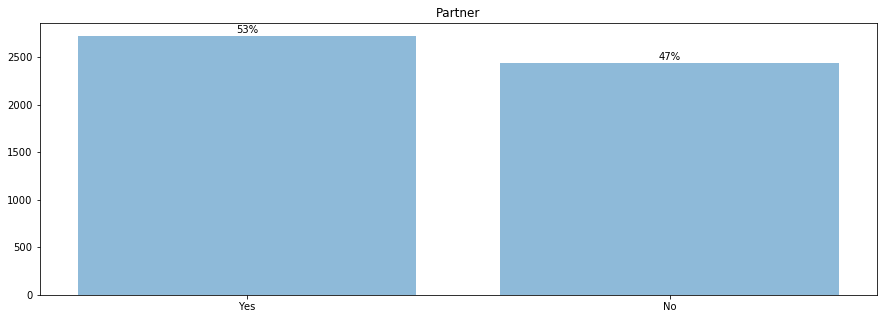

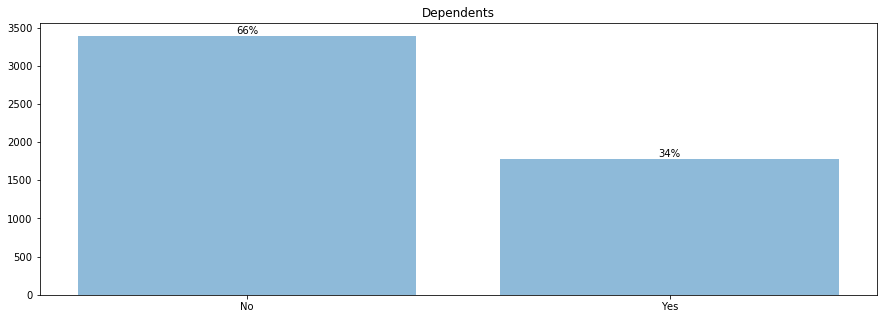

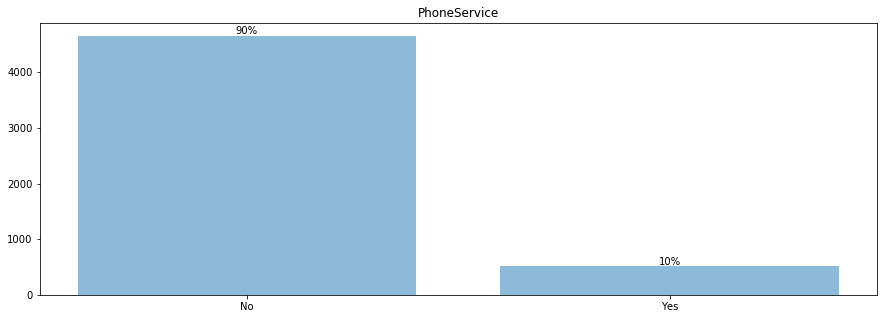

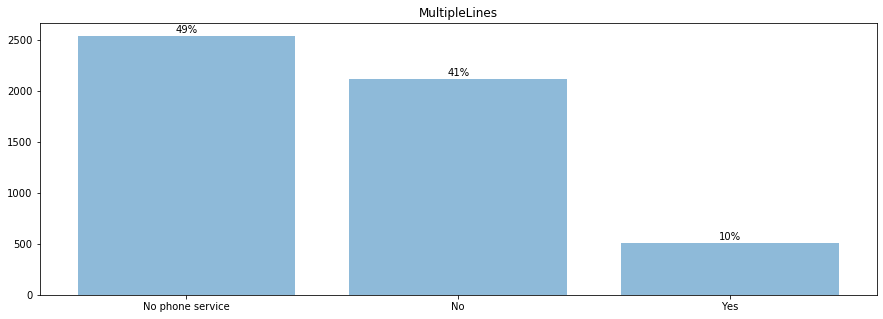

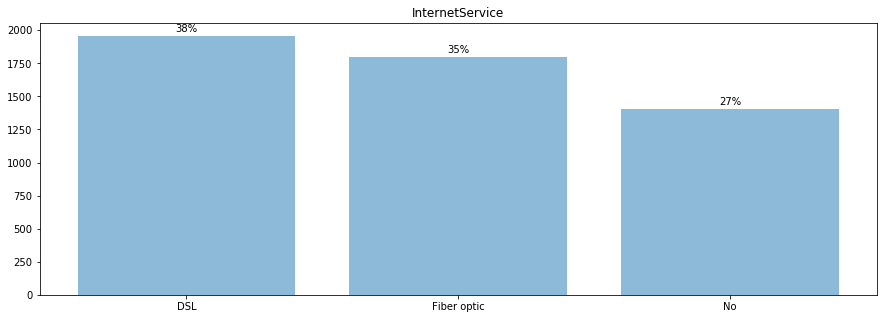

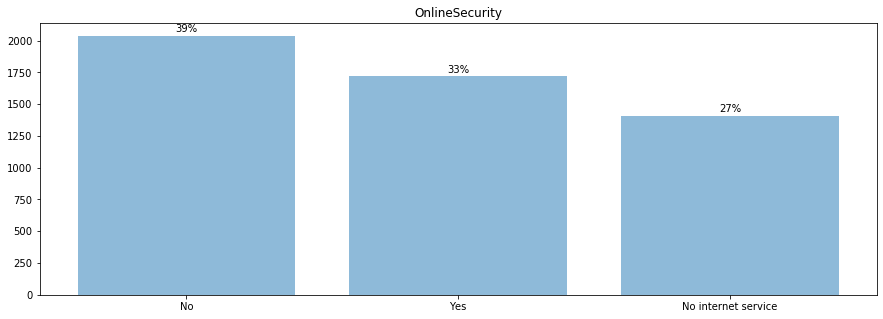

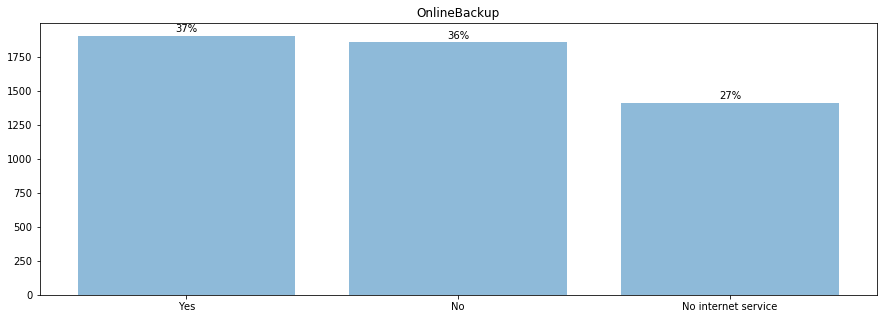

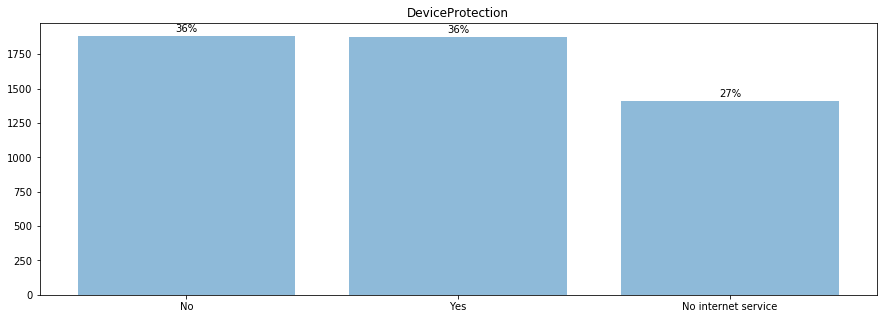

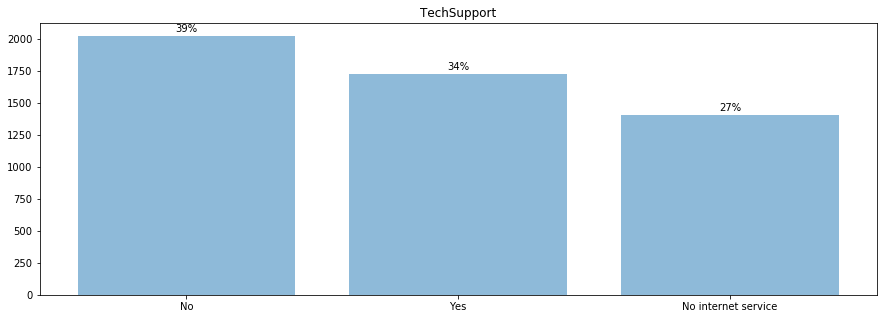

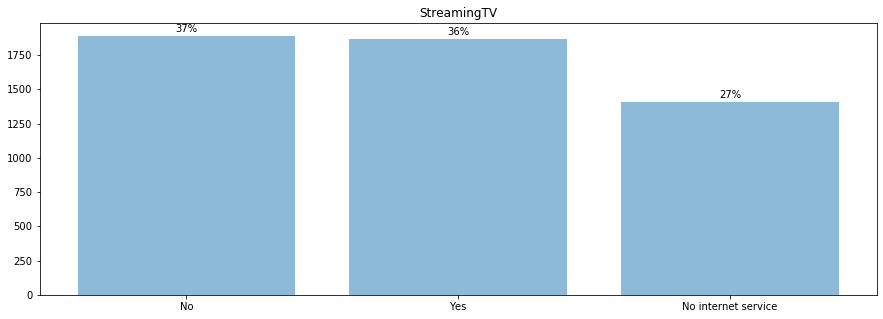

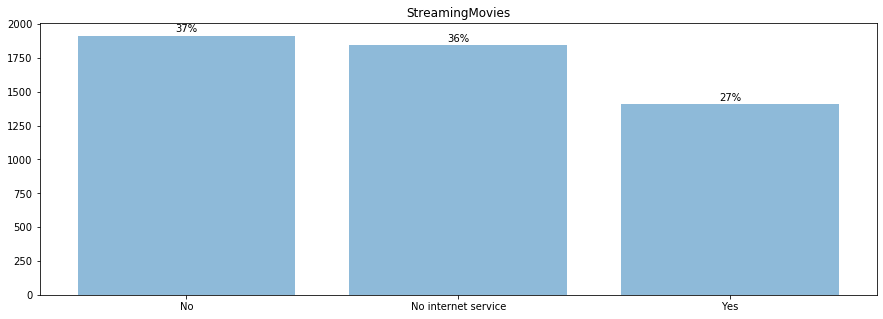

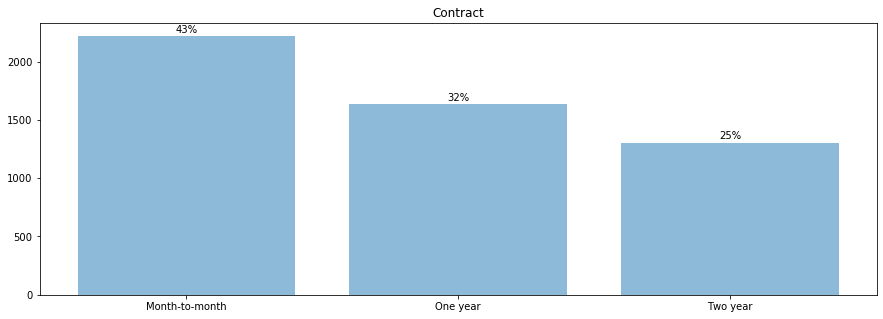

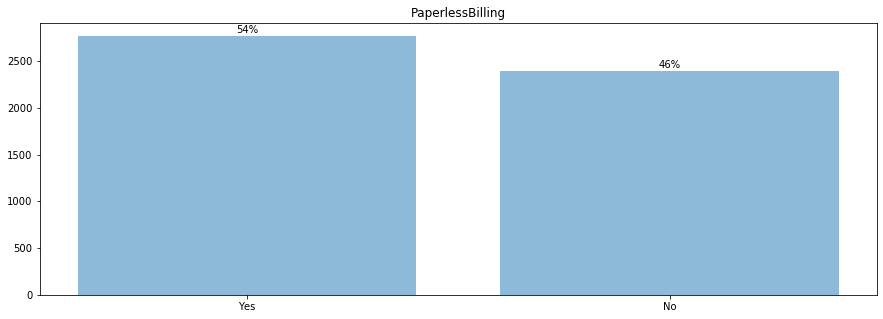

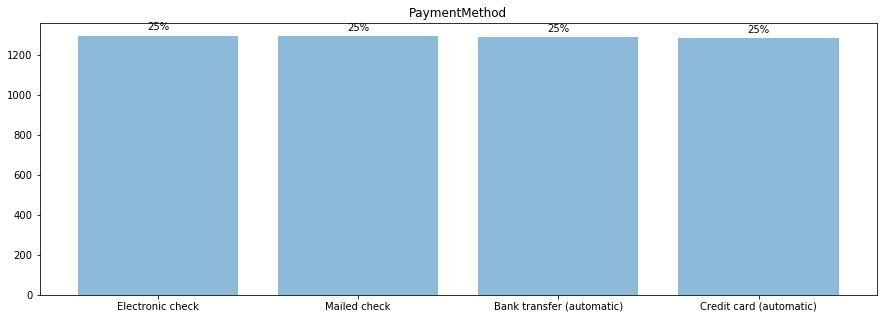

The customerID data is not plotted.
The tenure data is not plotted.
The MonthlyCharges data is not plotted.
The TotalCharges data is not plotted.
The Churn data is not plotted.


In [10]:
histogram(clients_df_loyal)

#### 2.2 Churn factor identification

We compare the charges and the tenure of all clients first, then only of those who are loyal.

**All customers**

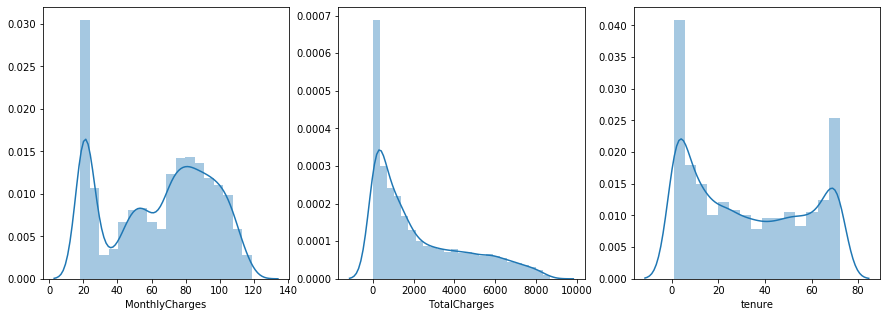

In [11]:
fig, ax = plt.subplots(1,3,figsize=(15,5));

sns.distplot(clients_df.MonthlyCharges, ax=ax[0]);
sns.distplot(clients_df.TotalCharges, ax=ax[1]);
sns.distplot(clients_df.tenure, ax=ax[2]);

**Loyal ones**

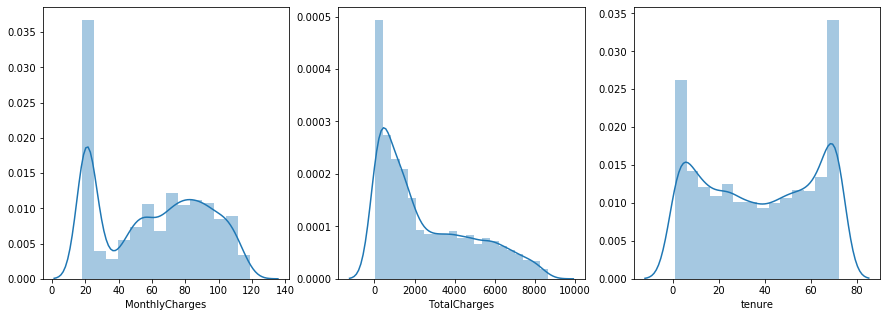

In [12]:
fig, ax = plt.subplots(1,3,figsize=(15,5));
sns.distplot(clients_df_loyal.MonthlyCharges, ax=ax[0]);
sns.distplot(clients_df_loyal.TotalCharges, ax=ax[1]);
sns.distplot(clients_df_loyal.tenure, ax=ax[2]);

We can conclude that the customers who churn mostly have a low tenure and comparatively lower total charges.

We compute the proportion of loyal clients :

In [13]:
print('There are {:.2%} of clients who churn.'.format(1-len(clients_df_loyal)/len(clients_df)))

There are 26.58% of clients who churn.


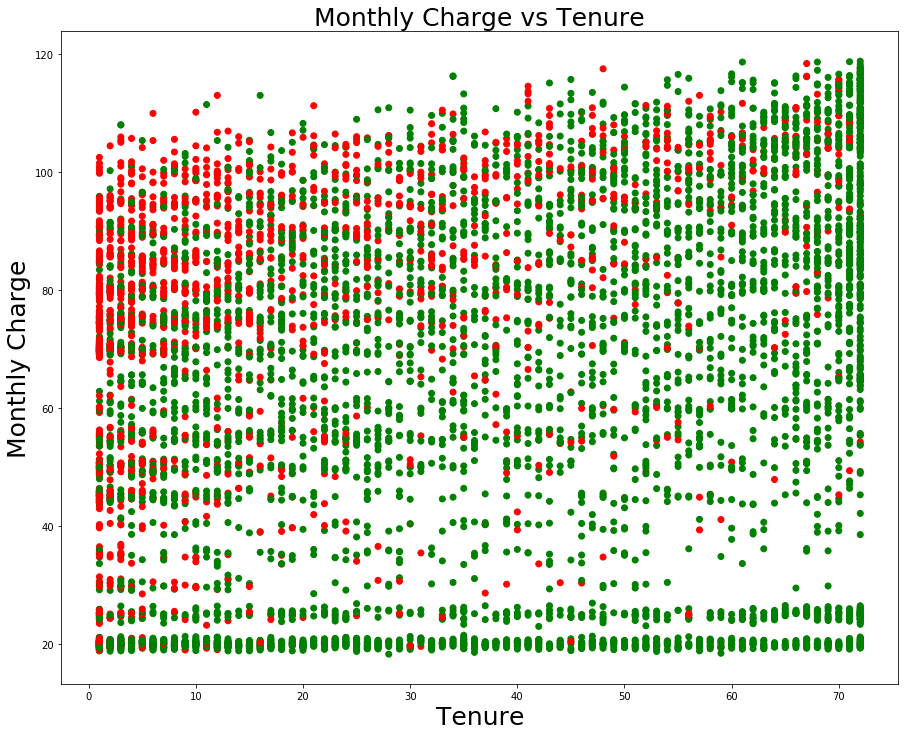

In [14]:
plt.figure(figsize=(15,12))
colors = np.array(['green', 'red'])[list(clients_df.Churn.replace({'Yes':1, 'No':0}))]
plt.scatter(list(clients_df.tenure),list(clients_df.MonthlyCharges) , c=colors)
plt.xlabel('Tenure', fontsize=25)
plt.ylabel('Monthly Charge', fontsize=25)
plt.title('Monthly Charge vs Tenure',fontsize=25 )
plt.show()

In [15]:
df_churn = clients_df[clients_df.Churn == 'Yes']
print('Average tenure of people who churned : {:.2f} months'.format(np.mean(list(df_churn.tenure))))
print('Median tenure of people who churned : {} months'.format(np.median(list(df_churn.tenure))))
print('Average Monthly Charge of people who churned : {:0.2f} dollars'.format(np.mean(list(df_churn.MonthlyCharges))))
print('Median Monthly Charge of people who churned : {} dollars'.format(np.median(list(df_churn.MonthlyCharges))))

Average tenure of people who churned : 17.98 months
Median tenure of people who churned : 10.0 months
Average Monthly Charge of people who churned : 74.44 dollars
Median Monthly Charge of people who churned : 79.65 dollars


From the graph above, a distinction between the people who churned (in red) and the loyal customers (in green) shows up. Indeed, most of the people who churned have low tenure and high monthly charges, which confirms the previous analysis. It is now interesting to see the factors that encourage people who actually stay.

#### 2.3 Category analysis

Usually what matters most to people is the service they get for the money they spend as well as how often they get charged. In other words, what type of contract they have.

We therefore analyze the type of contract customers have, the division of Internet Service and that of Phone Service for **all customers** on the left, and **loyal customers** on the right.

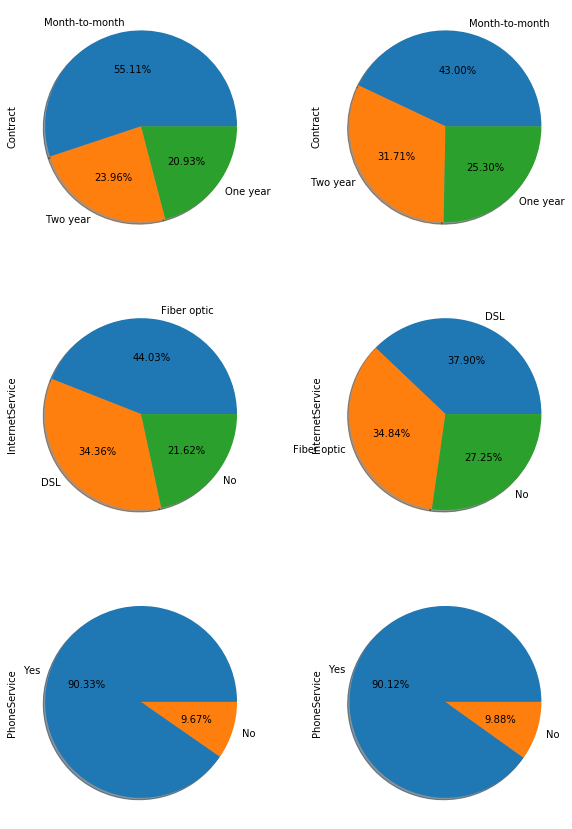

In [16]:
fig, ax = plt.subplots(3,2,figsize=(10,15))
clients_df.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[0,0])
clients_df.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[1,0])
clients_df.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[2,0])
clients_df_loyal.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[0,1])
clients_df_loyal.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[1,1])
clients_df_loyal.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[2,1]);

In [17]:
print('Month-to-month contracts among all customers : %s' %(len(clients_df.Contract[clients_df.Contract == 'Month-to-month'])))
print('Month-to-month contracts among loyal customers : %s' %(len(clients_df_loyal.Contract[clients_df_loyal.Contract == 'Month-to-month'])))
print('---\nOne year contracts among all customers : %s' %(len(clients_df.Contract[clients_df.Contract == 'One year'])))
print('One year contracts among loyal customers : %s' %(len(clients_df_loyal.Contract[clients_df_loyal.Contract == 'One year'])))
print('---\nTwo year contracts among all customers : %s' %(len(clients_df.Contract[clients_df.Contract == 'Two year'])))
print('Two year contracts among loyal customers : %s' %(len(clients_df_loyal.Contract[clients_df_loyal.Contract == 'Two year'])))

Month-to-month contracts among all customers : 3875
Month-to-month contracts among loyal customers : 2220
---
One year contracts among all customers : 1472
One year contracts among loyal customers : 1306
---
Two year contracts among all customers : 1685
Two year contracts among loyal customers : 1637


From the contract type pie chart, it can be seen that a majority of customers are charged month to month. Coincidentally, it is mostly customers who have a month-to-month contract who churn. A similar phenomenon is observed for the fiber optic internet service. Phone services remain stable however.

In [18]:
print('Fiber optic internet service among all customers : %s' %(len(clients_df.InternetService[clients_df.InternetService == 'Fiber optic'])))
print('Fiber optic internet service among loyal customers : %s' %(len(clients_df_loyal.InternetService[clients_df_loyal.InternetService == 'Fiber optic'])))
print('---\nDSL internet service among all customers : %s' %(len(clients_df.InternetService[clients_df.InternetService == 'DSL'])))
print('DSL internet service among loyal customers : %s' %(len(clients_df_loyal.InternetService[clients_df_loyal.InternetService == 'DSL'])))
print('---\nNo internet service among all customers : %s' %(len(clients_df.InternetService[clients_df.InternetService == 'No'])))
print('No internet service among loyal customers : %s' %(len(clients_df_loyal.InternetService[clients_df_loyal.InternetService == 'No'])))

Fiber optic internet service among all customers : 3096
Fiber optic internet service among loyal customers : 1799
---
DSL internet service among all customers : 2416
DSL internet service among loyal customers : 1957
---
No internet service among all customers : 1520
No internet service among loyal customers : 1407


#### 2.4 Continuous variables histograms

Here, we are going to see the monthly charges, total charges and tenure tendencies with a kernel density estimation.

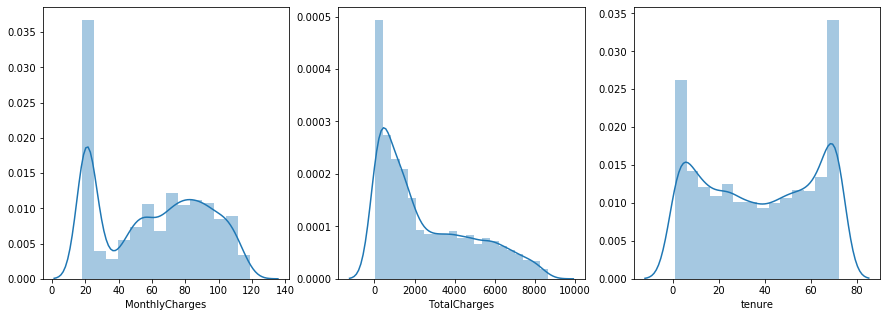

In [19]:
fig, ax = plt.subplots(1,3,figsize=(15,5));

sns.distplot(clients_df_loyal.MonthlyCharges, ax=ax[0]);
sns.distplot(clients_df_loyal.TotalCharges, ax=ax[1]);
sns.distplot(clients_df_loyal.tenure, ax=ax[2]);

Lets see if there is any impact of the type of contract on the tenure of the clients :

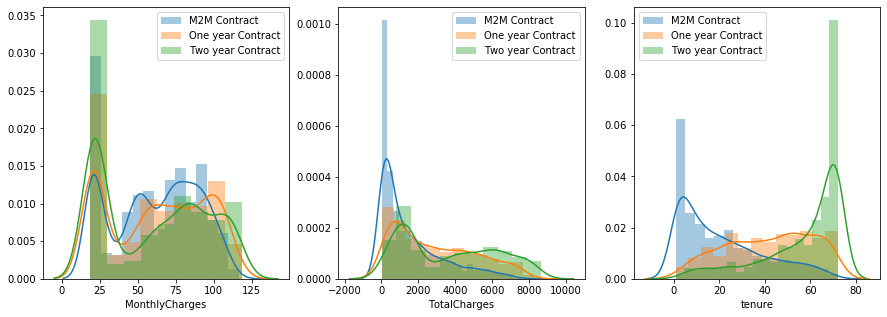

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15,5));


clients_df_loyal_M2M=clients_df_loyal[clients_df_loyal.Contract=="Month-to-month"]
clients_df_loyal_1year=clients_df_loyal[clients_df_loyal.Contract=="One year"]
clients_df_loyal_2year=clients_df_loyal[clients_df_loyal.Contract=="Two year"]

kde_monthlycharges=sns.distplot(clients_df_loyal_M2M.MonthlyCharges,label="M2M Contract", ax=ax[0])
kde_monthlycharges=sns.distplot(clients_df_loyal_1year.MonthlyCharges,label="One year Contract", ax=ax[0])
kde_monthlycharges=sns.distplot(clients_df_loyal_2year.MonthlyCharges,label="Two year Contract", ax=ax[0])
kde_monthlycharges.legend()


kde_totalcharges=sns.distplot(clients_df_loyal_M2M.TotalCharges,label="M2M Contract", ax=ax[1])
kde_totalcharges=sns.distplot(clients_df_loyal_1year.TotalCharges,label="One year Contract", ax=ax[1])
kde_totalcharges=sns.distplot(clients_df_loyal_2year.TotalCharges,label="Two year Contract", ax=ax[1])
kde_totalcharges.legend()


kde_tenure=sns.distplot(clients_df_loyal_M2M.tenure,label="M2M Contract", ax=ax[2])
kde_tenure=sns.distplot(clients_df_loyal_1year.tenure,label="One year Contract", ax=ax[2])
kde_tenure=sns.distplot(clients_df_loyal_2year.tenure,label="Two year Contract", ax=ax[2])
kde_tenure.legend();

The first graph clearly shows that the type of contract impacts the tenure. Indeed, the charges billed month-to-month usually have a lower tenure, whereas a two year contract forces the clients to stay for a longer period with the telecom company.

The monthly charges histogram shows fewer differences and is more spread out between values, with 2 year contracts having, at both extremes, both the lowest and the highest monthly charges.

The monthly charge and total charge histograms show fewer differences. Indeed, they have the same Kernel Density Estimation shape for the 3 types of contracts, with a dominance of the $25 monthly charges.

Moreover, we can observe that even though the lowest monthly charges are predominant for all types of contracts, the total charges are more uniform i.e clients will stay longer for lower monthly charges but will give more money over time. 

Finally, as might be expected, there is a positive correlation between customers taking a two year contract and them having longer tenures. Indeed, for the two year contract, the predominant tenure is 70 months which means that clients were satisfied and often renewed their 2 year contract. 

We can therefore say that one of the goals of the marketing departement will be to do major efforts to create attractive offers for the 2 year contracts with low monthly charges (around $25).

#### 2.5 Multivariate descriptive statistics

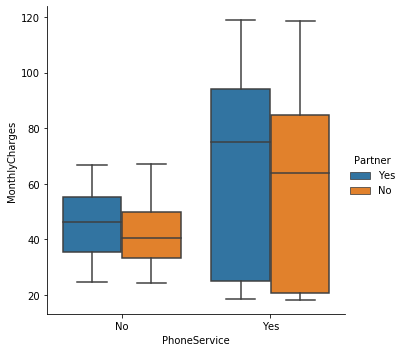

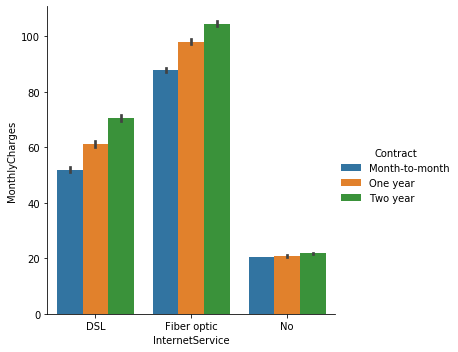

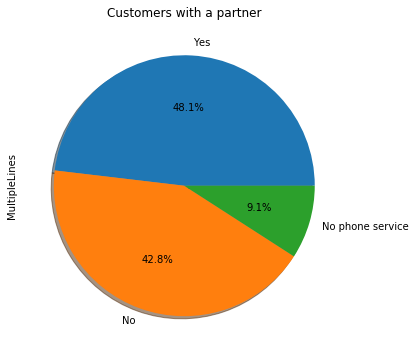

In [21]:
sns.catplot(x="PhoneService", y="MonthlyCharges", kind="box", hue="Partner", data=clients_df_loyal)
sns.catplot(x="InternetService", y="MonthlyCharges", kind="bar", hue="Contract", data=clients_df_loyal);
plt.figure(figsize=(6,6))
clients_df_loyal[clients_df_loyal['Partner'] == 'Yes'].MultipleLines.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', title='Customers with a partner');

With the previous plots, it is possible to study the link between the contract type and the tenure. 

From the pie plot, we can see that customers with a partner tend to have higher invoices. It could be explained by assuming that these customers might have a family and they might need other offers and package which could increase their bills. These customers tend to have multiple lines as well. Therefore, the increased bills may come from certain package offers. 

We can observe that customers with phone service have higher bills on average with a higher variance while the customers without phone service pay less on average but have a smaller variance. 

Looking at the last chart, customers with additional internet service such as DSL or Fiber optic have higher monthly charges. This gives an indication about which kind of contract could be the most expensive. Independently from the kind of contract, the monthly charges are higher with DSL and Fiber optic.

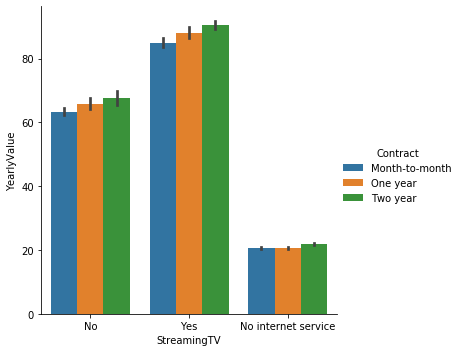

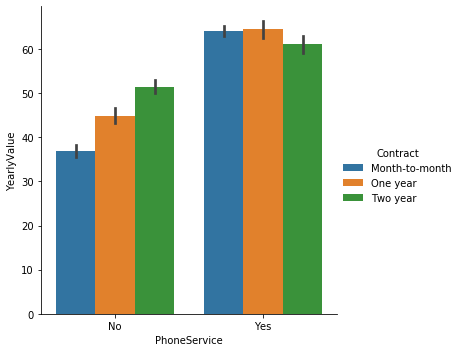

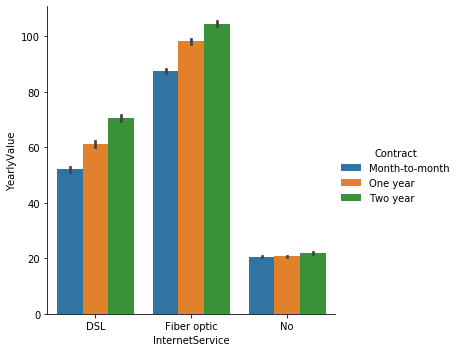

In [22]:
clients_df_loyal["YearlyValue"] = clients_df_loyal["TotalCharges"].astype(float)/clients_df_loyal["tenure"].astype(float)

sns.catplot(x="StreamingTV", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal)
sns.catplot(x="PhoneService", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal)
sns.catplot(x="InternetService", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal);
#plt.close()
#plt.close()
#plt.close()

We are now going to study the influence the services provided by the company on the yearly value. 

We can notice from these 3 plots that customers with 2 year contracts tend to pay more on every kind of service. We can expect customers with longer-term contracts to subscribe to offers with more options within the particular service. Thus, it increases the amount paid on yearly value.  

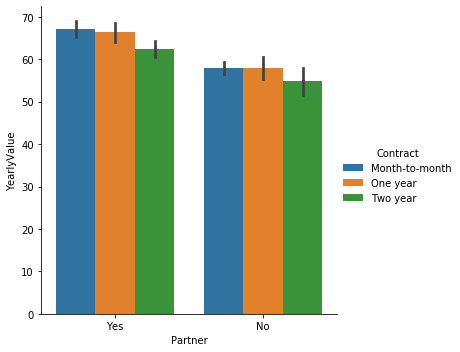

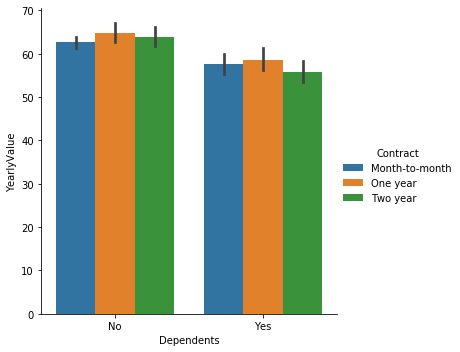

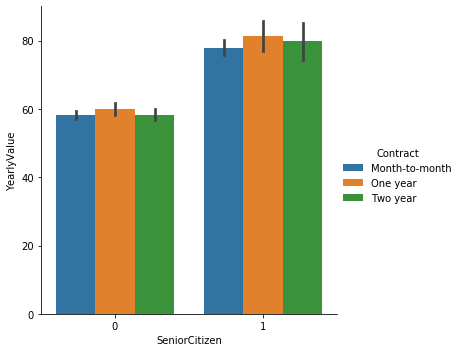

In [23]:
sns.catplot(x="Partner", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal)
sns.catplot(x="Dependents", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal)
sns.catplot(x="SeniorCitizen", y="YearlyValue", kind="bar", hue="Contract", data=clients_df_loyal);

Here we are begining our analysis taking into account the social status and contract type of the customers. 

Customers with a partner tend to have a smaller yearly value and favor month-to-month contracts while customers wihtout a partner have a higher yearly value and follow the same pattern regarding contracts. We can observe that dependant customers follow almost the same pattern with a slightly lower yearly value. 

Regarding senior citizen, we observe the opposite. They tend to have a higher yearly value and favor longer-term contracts.

Thus, the marketing department should focus their efforts on keeping non senior citizens and trying to get them to sign on for longer offers. 

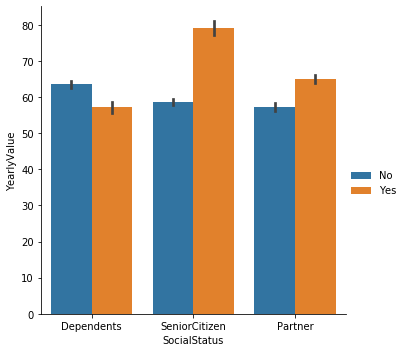

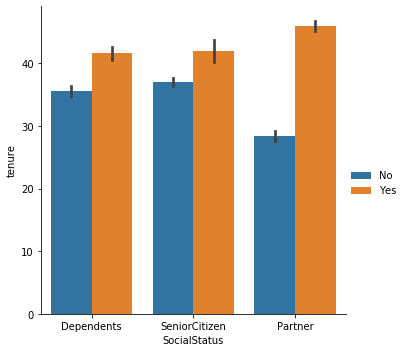

In [24]:
cols = ["Dependents", "SeniorCitizen", "Partner"]
clients_df_loyal.loc[clients_df_loyal['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'
clients_df_loyal.loc[clients_df_loyal['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
df_merge = clients_df_loyal.melt(id_vars = ["YearlyValue","tenure"],value_vars = cols).rename({'variable':'SocialStatus','value':' '},axis=1)
df_merge.head()

sns.catplot(data=df_merge,x='SocialStatus', y="YearlyValue", kind="bar", hue=" ")
sns.catplot(data=df_merge,x='SocialStatus',y="tenure",kind="bar",hue=" ");

Here we can notice the impact of the social status on tenure and yearly value. Senior citizens and customers with a partner tend to have a larger tenure and yearly value than dependent customers. This element could help the marketing department as they could focus on retention of the first two categories rather than on dependent customers.

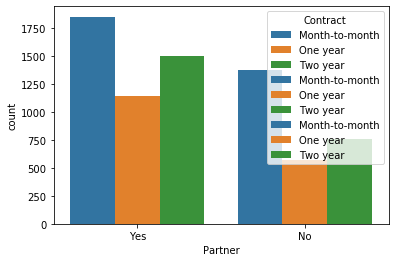

In [25]:
sns.countplot(x="Dependents",hue="Contract",data=clients_df_loyal)
sns.countplot(x="SeniorCitizen",hue="Contract",data=clients_df_loyal)
sns.countplot(x="Partner",hue="Contract",data=clients_df_loyal);

### 3. Conclusion

To summarise, there is a 26.58% churn rate. The customers who churn have a median tenure of 10 months and an average tenure of 17.98 months, a median monthly charge of \$79.65 and an average of \$74.44. They have a comparatively lower tenure than those who stay.

Customers with a short-term contract tend to have a lower tenure, however clients will stay longer for lower monthly charges.

Customers with a partner and/or internet service tend to have higher charges and those with phone service have higher charges and variance than those without.

Customers with 2-year contracts tend to pay more for every service.

Customers with a partner tend to have a lower yearly value than those without and favor month-to-month contracts. Dependent customers have a slightly lower yearly value than them, but senior citizens have a much higher yearly value and favor long-term contracts.

The goals of the marketing department should therefore be :
-	To create attractive offers for 2-year contracts with low monthly charges
-	To retain or acquire senior citizens and get them to sign long-term contracts
